In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("kendall_corr.csv")
df_month

,February_2,May_6,August,April_7,April_3,May_10,April_13,November_2,July_2,September_2,...,May_4,September_4,January_4,January_3,April_2,July,April_8,March,July_3,January_2
0,0.483186,-0.175275,-0.469484,-0.192907,-0.510503,0.056523,-0.139798,-0.109396,-0.352645,-0.047457,...,-0.146478,-0.012603,0.604409,0.480649,0.085459,-0.599803,-0.910773,-0.907154,-0.084476,1.024350
1,0.116145,-0.767088,-0.469484,-0.155950,-0.239307,0.650787,-0.343262,-0.109396,-0.352645,-0.047457,...,-0.115043,-0.012603,0.035629,0.230043,0.229490,-0.599803,-0.614188,-0.443577,-0.084476,0.737523
2,0.471996,-0.225223,-0.720683,-0.271062,-0.490269,-0.117836,-0.176245,-0.311940,-0.487442,0.085788,...,-0.271783,-0.400264,0.186294,0.625498,0.118633,-0.506850,-0.519407,-0.985656,-0.037638,0.707607
3,0.420501,-0.321780,-0.270299,0.424437,-0.429062,0.573503,-0.350389,-0.186002,-0.525502,0.372848,...,-0.134708,0.110438,0.248668,0.102065,0.420907,-0.322204,-0.394411,-0.320712,-0.335546,0.554919
4,0.158944,-0.419739,-0.794188,-0.115674,-0.327994,-0.201221,-0.457755,-0.346547,-0.596076,0.264824,...,-0.306510,0.144277,-0.162981,0.049449,-0.049493,-0.522521,-0.031852,-0.545358,-0.234432,0.646971
5,0.522460,-0.525846,-0.810097,0.022826,-0.711481,0.868295,-0.221788,-0.257244,-1.021302,0.374423,...,-0.389436,0.054123,0.509715,0.213054,-0.195406,-0.592175,0.074234,-0.212050,-0.375526,0.830451
6,0.014395,-0.043810,-0.177833,0.090922,-0.023152,0.184597,0.146627,-0.426177,0.021368,0.181950,...,-0.414848,0.237874,0.305775,0.256707,0.344380,-0.563354,-0.093650,-0.259086,-0.345080,0.781353
7,0.171814,-0.391165,-1.010284,-0.177244,-0.588995,0.145341,0.111823,-0.607592,0.351354,0.536901,...,-0.466422,-0.431167,0.219938,0.390634,0.010624,-0.228093,0.030755,-0.179778,-0.576947,0.805724
8,0.445708,-0.261227,-0.426508,-0.057897,-0.479884,0.333250,0.077770,-0.235158,-0.304934,0.272434,...,-0.194922,0.020960,0.221153,0.262402,0.443440,-0.714455,-0.646656,-0.162627,-0.333695,0.440587
9,0.261804,-0.571863,-0.589004,0.377096,-0.374410,0.446709,-0.154538,-0.347571,-0.550968,0.319306,...,-0.311517,-0.097211,0.299635,0.342331,-0.212123,-0.738149,-0.066338,-0.041109,-0.669065,0.873517


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :15]
x_train = scaler.fit_transform(x_train)
x_train

array([[ 8.46604291e-01,  1.14820287e+00,  4.93987433e-01,
        -1.38666439e+00,  1.28642413e-01, -1.19059994e+00,
        -1.02080814e-02,  6.98441533e-01,  9.22093577e-03,
        -1.83353978e+00,  4.63614852e-01, -2.45935836e-01,
         1.53651240e+00,  2.66153833e-01, -1.13615287e+00],
       [-1.43981540e+00, -7.12181490e-01,  4.93987433e-01,
        -1.24442718e+00,  1.37171900e+00,  1.24568302e+00,
        -8.04032398e-01,  6.98441533e-01,  9.22093577e-03,
        -1.83353978e+00,  4.63614852e-01,  2.62812543e-01,
         1.53651240e+00,  1.00472307e+00, -9.74519467e-01],
       [ 7.76902108e-01,  9.91190101e-01, -3.75732655e-01,
        -1.68746489e+00,  2.21386021e-01, -1.90541201e+00,
        -1.52410116e-01, -4.23141589e-01, -3.06661824e-01,
        -1.09110286e+00, -2.11511086e-01,  6.81230310e-01,
        -7.84170090e-01,  8.01873134e-01,  1.90013456e+00],
       [ 4.56120085e-01,  6.87659667e-01,  1.18362149e+00,
         9.89353439e-01,  5.01941216e-01,  9.28844580

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :15]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 1.58349574,  0.58207209, -0.5242643 , -0.56834002, -0.09530993,
        -1.23143643,  0.70012832,  1.72019939,  1.30321924,  0.44899201,
        -0.21570834,  0.08850924, -0.64931596,  0.70498912, -0.39739105],
       [-0.32727854,  0.5250594 , -1.82921775, -0.79142582,  1.1233477 ,
         1.40762748,  2.3168683 ,  0.15761628,  1.1258208 ,  0.89230884,
         1.75745985,  1.3411365 ,  1.54920182, -1.78412667, -1.2470278 ],
       [ 0.79271338,  1.48073281,  0.88548891,  1.06403682,  0.39592217,
         0.09791316,  0.03693208,  0.58035655,  1.31423715,  0.504792  ,
        -1.23312489,  0.4697772 , -2.86635797, -0.21425681, -0.74657098],
       [ 0.6750798 ,  0.59774003, -0.08459292, -1.26569071, -0.47062222,
         0.05540889,  0.36205552,  0.84446834,  0.70177579,  0.73781902,
        -1.40694643,  1.08271049,  0.14250257,  0.62282088, -2.16010539],
       [-0.45579125, -2.11274412, -0.44164646,  0.17494873, -0.69500983,
         0.38949863,  1.14419741,  1.24283277, 

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 41}
Best Score: 0.36512070654062195
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 13}
Best Score: 0.30064450309281765
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 42}
Best Score: 0.3858790112407594
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 42}
Best Score: 0.3115718446304715
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 31}
Best Score: 0.3246248395492014


In [13]:
y_pred_list

[array([ 0.05058203,  0.26982288,  0.0361461 , -0.03459616, -0.10084364,
        -0.11648535,  0.16114113, -0.36998683,  0.056147  , -0.38246491,
        -0.44590459, -0.2376147 ,  0.00694199,  0.34045624,  0.03987475,
        -0.0753612 ]),
 array([ 0.11779879, -0.09931775,  0.0188458 ,  0.10477925, -0.26471661,
         0.12715134,  0.29773555, -0.50391553,  0.26721811,  0.03737488,
        -0.7187679 , -0.33426018, -0.31930014,  0.33384062,  0.17563561,
         0.06404333]),
 array([ 0.06565097,  0.27253571, -0.04100275,  0.21135822,  0.03844083,
        -0.08412799,  0.10192396, -0.42157297,  0.27017811, -0.44434247,
        -0.41320851, -0.16731069, -0.13031825,  0.35262145,  0.15054253,
        -0.05314865]),
 array([ 0.12951789,  0.44169788,  0.05665106, -0.09244521, -0.08166894,
        -0.12911604,  0.09588268, -0.38061618, -0.01540789, -0.39720126,
        -0.48182314, -0.26479616,  0.04786886,  0.38143788, -0.00313615,
        -0.06951156]),
 array([ 0.21297761,  0.55437211

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.4451421032335677,
 0.39780469841285265,
 0.5689682922540564,
 0.34223826409109565,
 0.27327184601349414]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 41}
Best Score: 0.36512070654062195
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 13}
Best Score: 0.30064450309281765
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 42}
Best Score: 0.3858790112407594
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 42}
Best Score: 0.3115718446304715
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 31}
Best Score: 0.3246248395492014


In [21]:
y_pred_list_rf

[array([ 0.05058203,  0.26982288,  0.0361461 , -0.03459616, -0.10084364,
        -0.11648535,  0.16114113, -0.36998683,  0.056147  , -0.38246491,
        -0.44590459, -0.2376147 ,  0.00694199,  0.34045624,  0.03987475,
        -0.0753612 ]),
 array([ 0.11779879, -0.09931775,  0.0188458 ,  0.10477925, -0.26471661,
         0.12715134,  0.29773555, -0.50391553,  0.26721811,  0.03737488,
        -0.7187679 , -0.33426018, -0.31930014,  0.33384062,  0.17563561,
         0.06404333]),
 array([ 0.06565097,  0.27253571, -0.04100275,  0.21135822,  0.03844083,
        -0.08412799,  0.10192396, -0.42157297,  0.27017811, -0.44434247,
        -0.41320851, -0.16731069, -0.13031825,  0.35262145,  0.15054253,
        -0.05314865]),
 array([ 0.12951789,  0.44169788,  0.05665106, -0.09244521, -0.08166894,
        -0.12911604,  0.09588268, -0.38061618, -0.01540789, -0.39720126,
        -0.48182314, -0.26479616,  0.04786886,  0.38143788, -0.00313615,
        -0.06951156]),
 array([ 0.21297761,  0.55437211

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.4451421032335677,
 0.39780469841285265,
 0.5689682922540564,
 0.34223826409109565,
 0.27327184601349414]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axvline(x=0, color='black', linewidth=2)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'AT+hgt Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/AT+hgt/15 predictors/kendall/comparison plots/randomforest


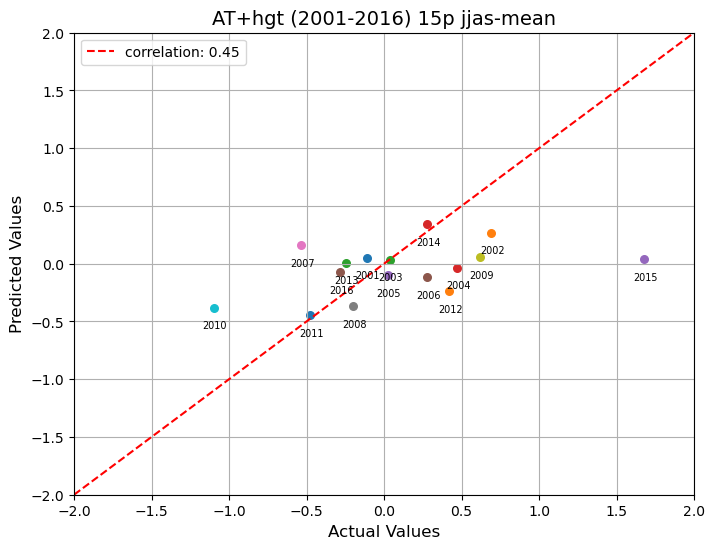

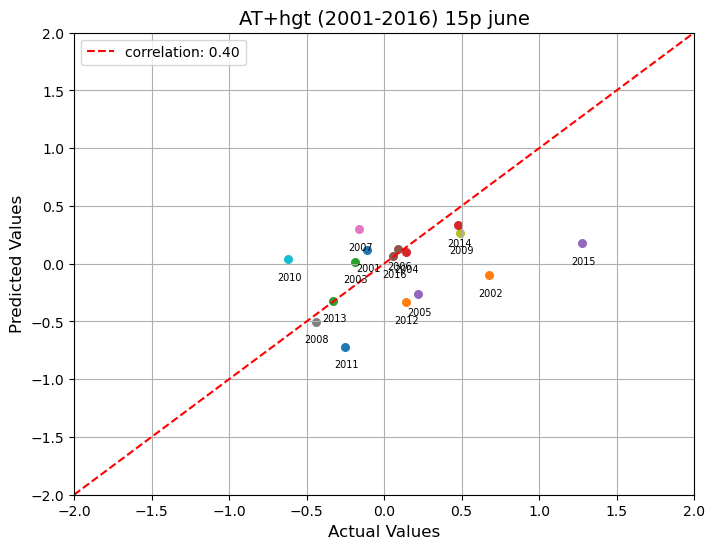

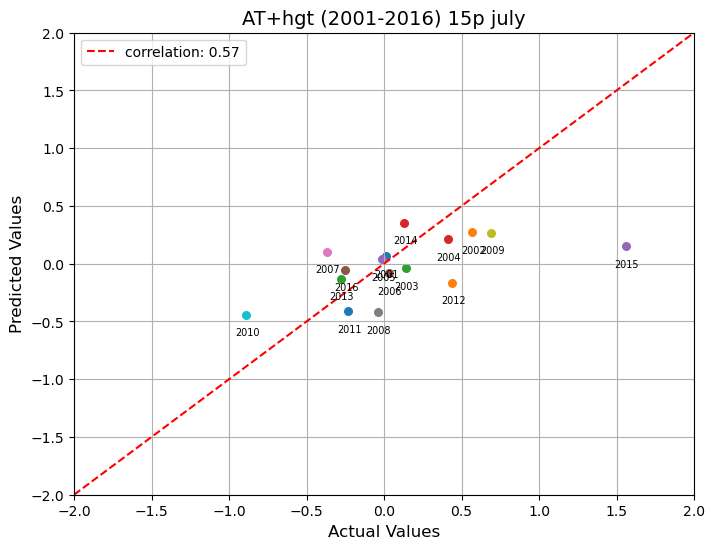

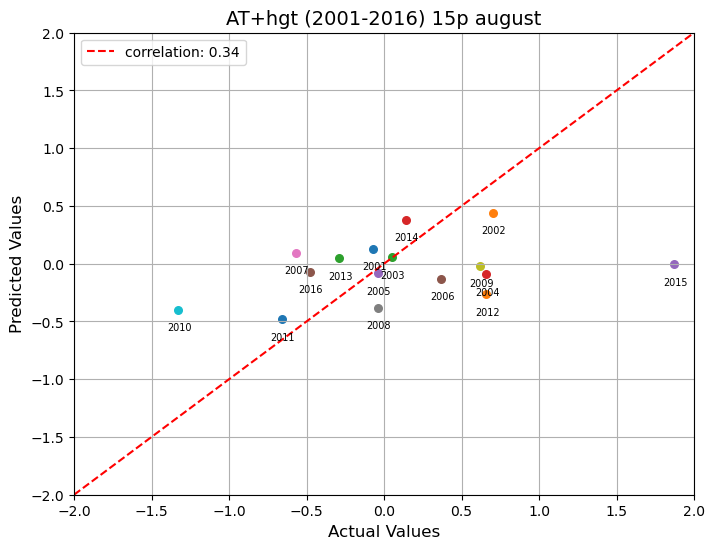

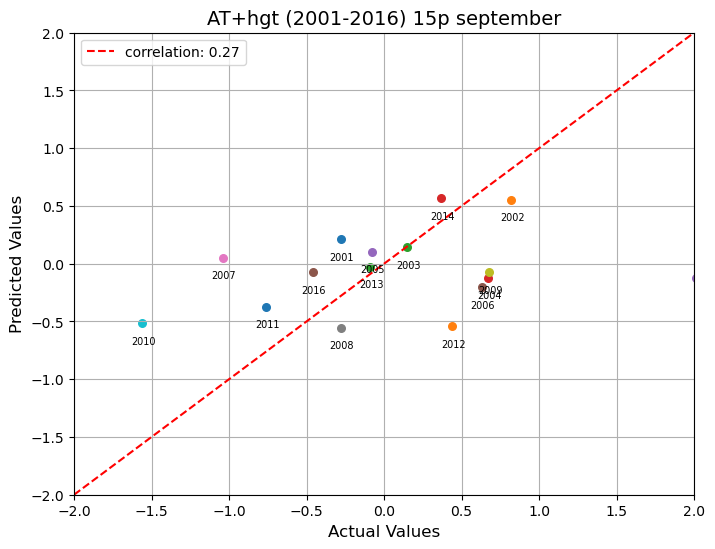

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30,)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=7)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    #plt.axhline(y=0, color='black', linewidth=1)
    #plt.axvline(x=0, color='black', linewidth=1)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show

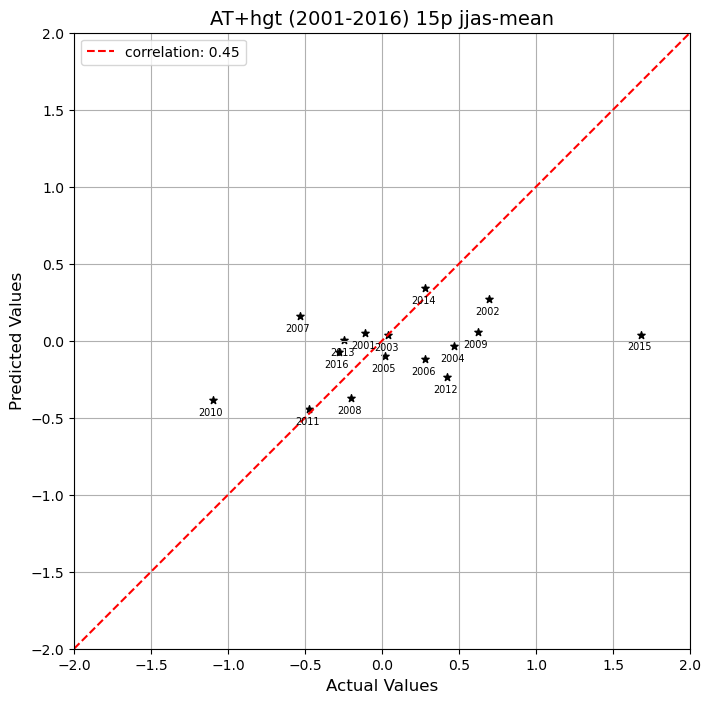

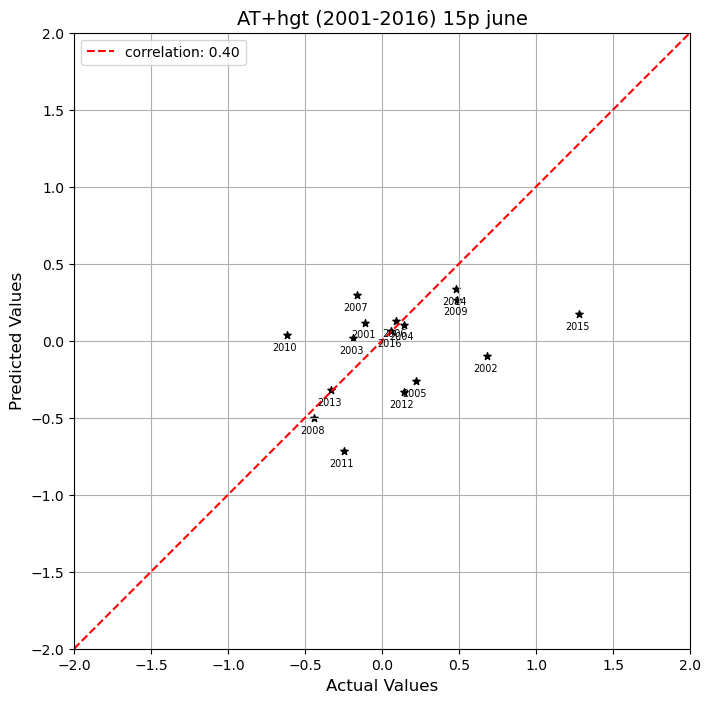

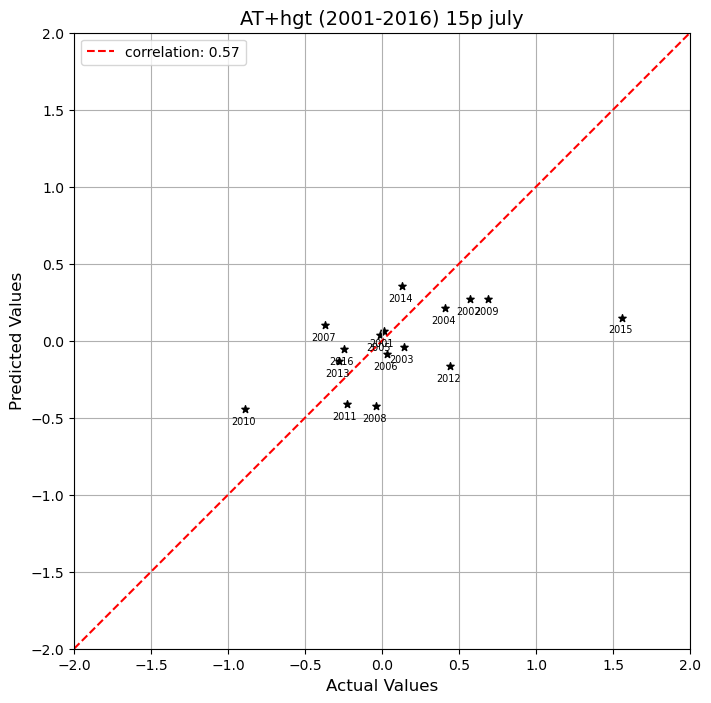

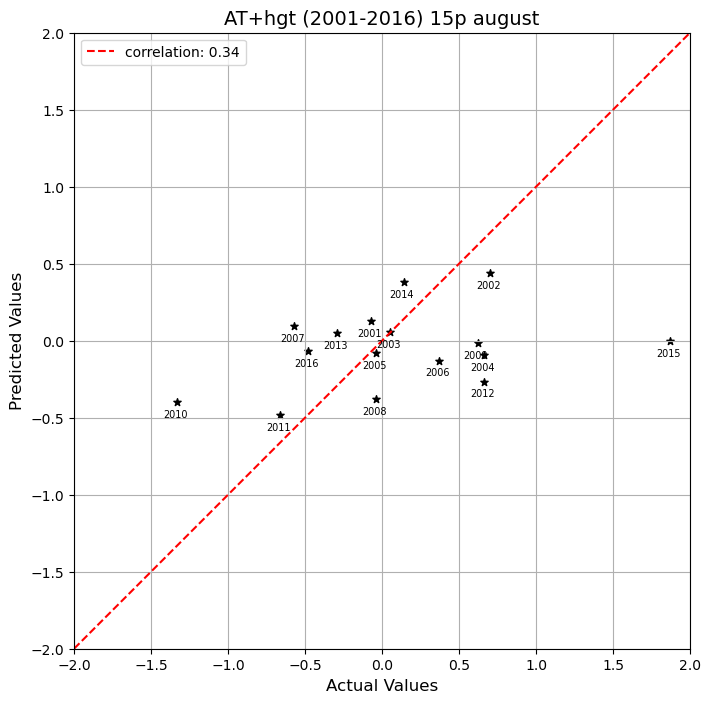

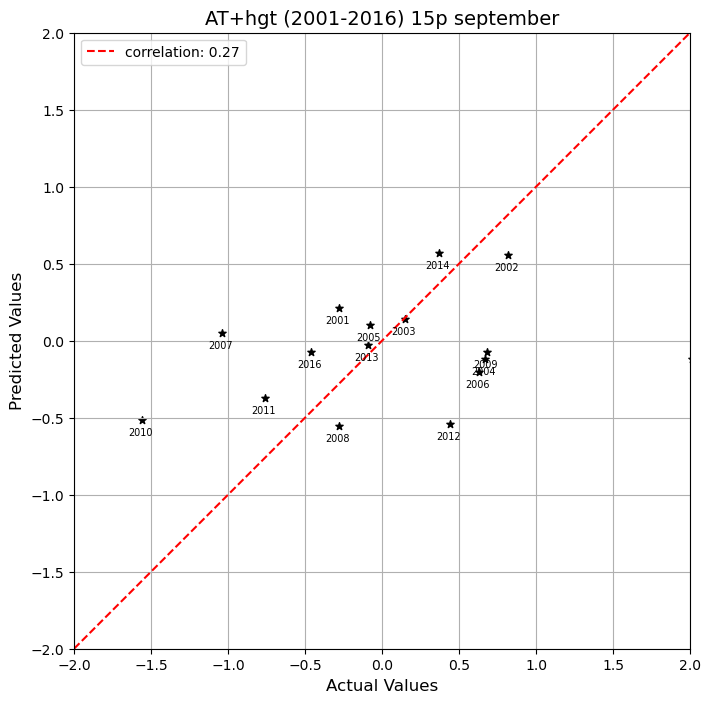

In [27]:
for i in range(5):
    actual_values = y_test[i]  # Replace with your actual values
    predicted_values = y_pred_list_rf[i]  # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(10, 8))  # Increased figure size

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30, marker='*',color='black')  # Increased marker size
        plt.annotate(f"{year}", (actual, predicted), xytext=(-10, -11), textcoords='offset points', fontsize=7)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.gca().set_aspect('equal')  # Set aspect ratio to be equal
    plt.grid(True)
    plt.legend()
    plt.show()


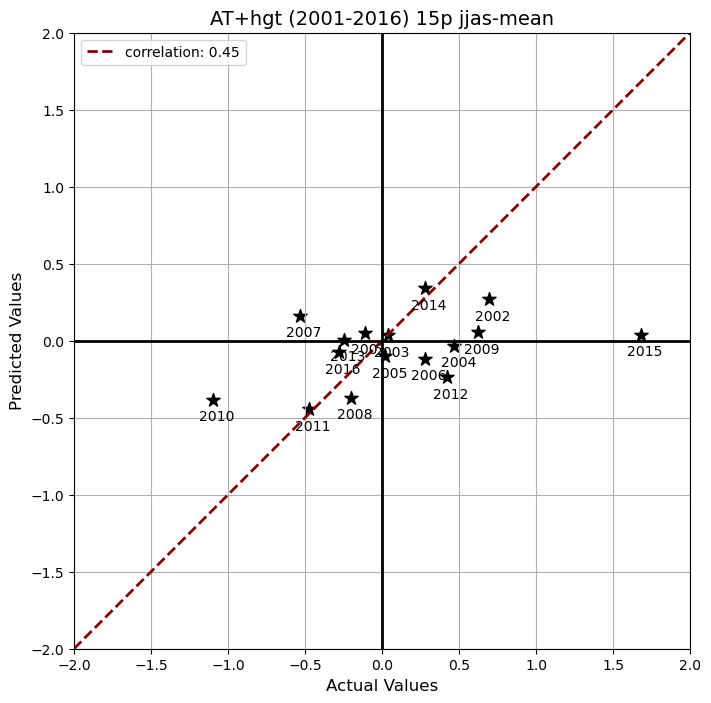

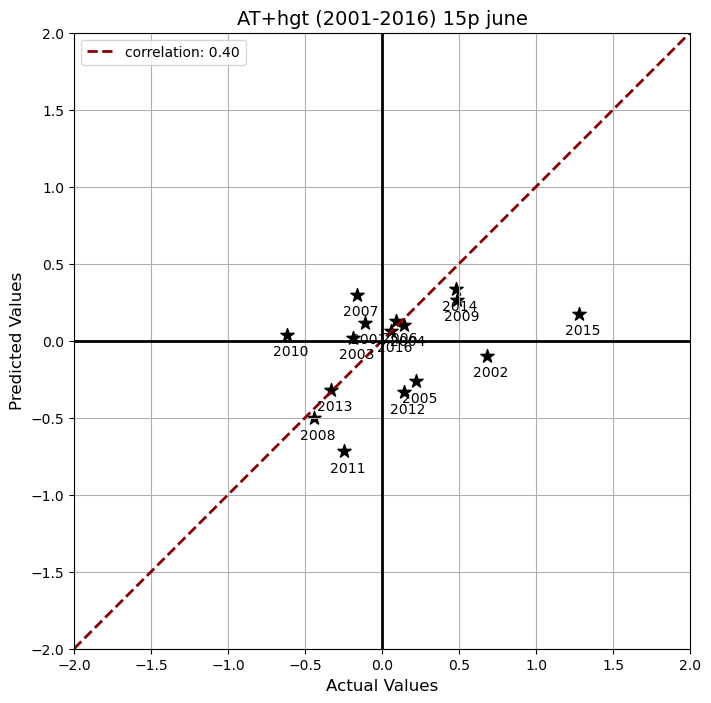

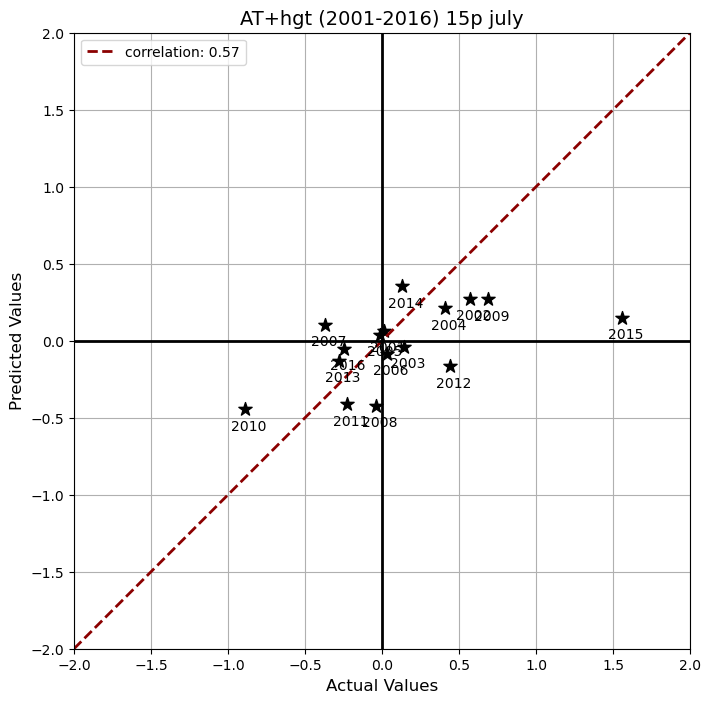

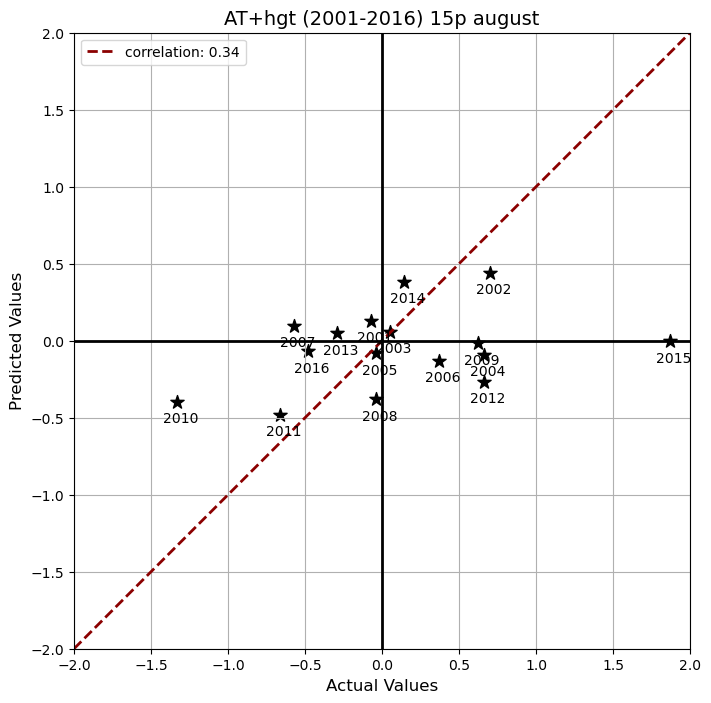

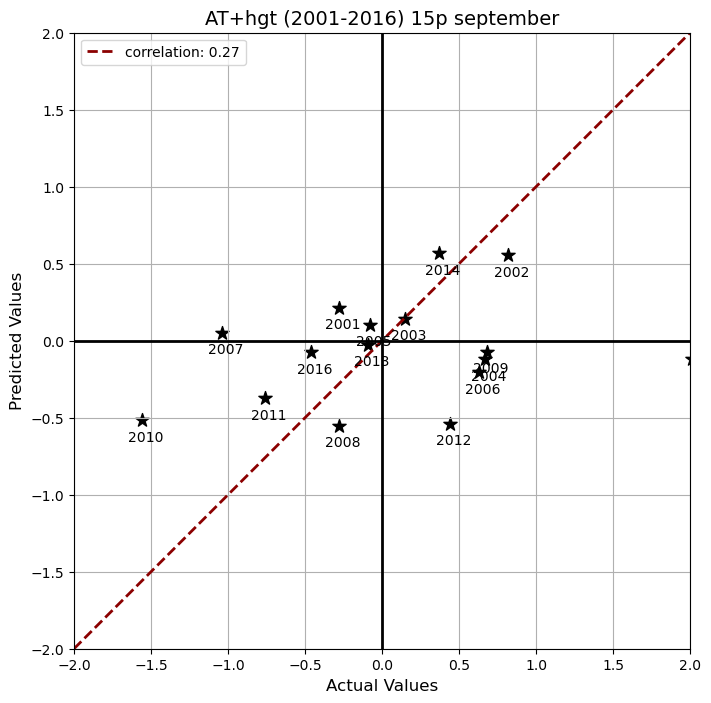

In [28]:
for i in range(5):
    actual_values = y_test[i]  # Replace with your actual values
    predicted_values = y_pred_list_rf[i]  # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(10, 8))  # Increased figure size

    # Create scatter plot with star markers and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=100, marker='*', color='black')  # Use star markers in black
        plt.annotate(f"{year}", (actual, predicted), xytext=(-10, -15), textcoords='offset points', fontsize=10)

    # Add diagonal line with darker color
    plt.plot([-2, 2], [-2, 2], color='darkred', linestyle='--', linewidth=2, label=f'correlation: {correlation_list[i]:.2f}')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.axvline(x=0, color='black', linewidth=2)

    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

    plt.gca().set_aspect('equal')  # Set aspect ratio to be equal
    plt.grid(True)
    plt.legend()
    plt.show()


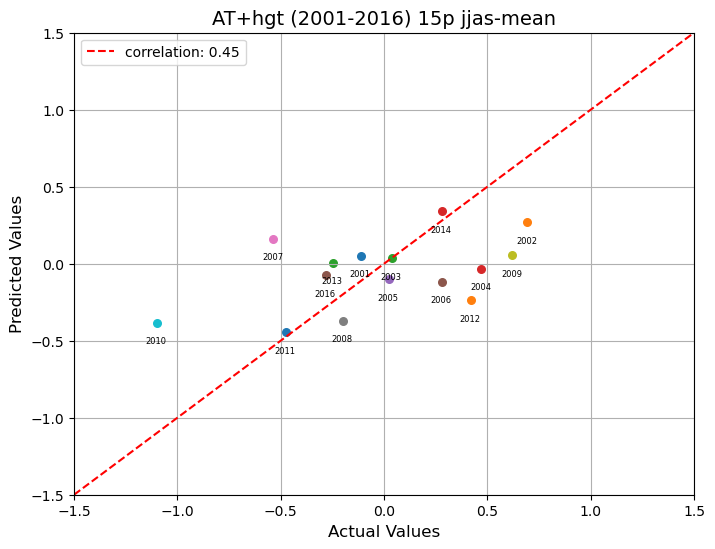

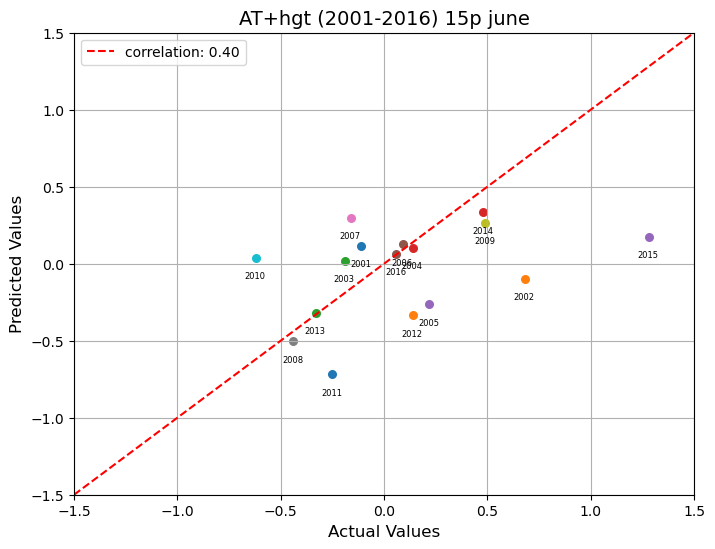

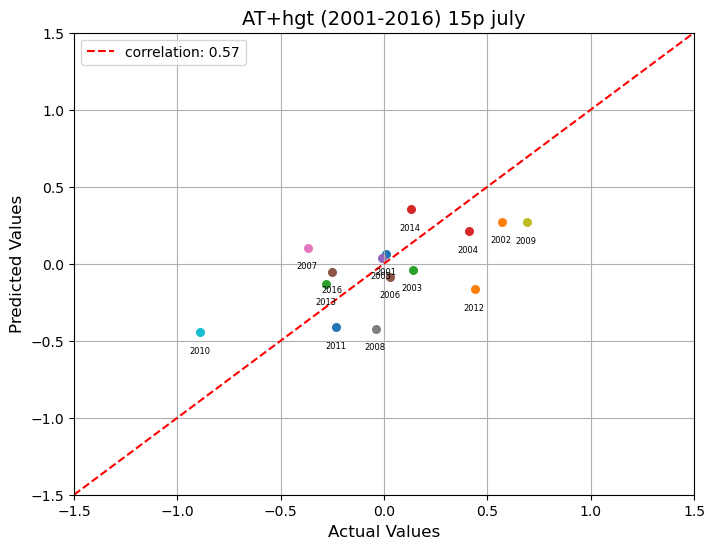

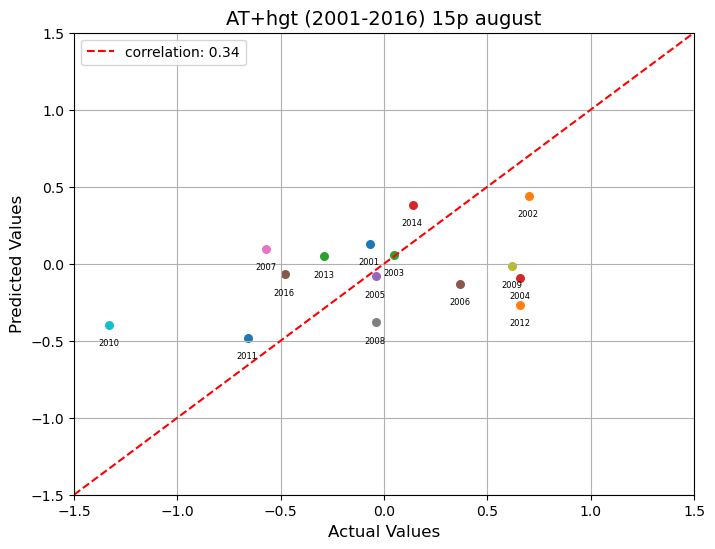

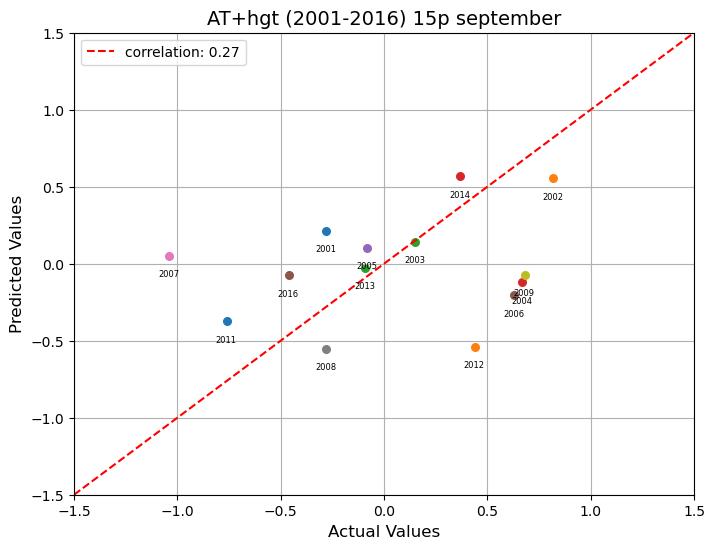

In [29]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-1.5, 1.5], [-1.5, 1.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-1.5, 1.5)  # Set limits from -2 to 2
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.show

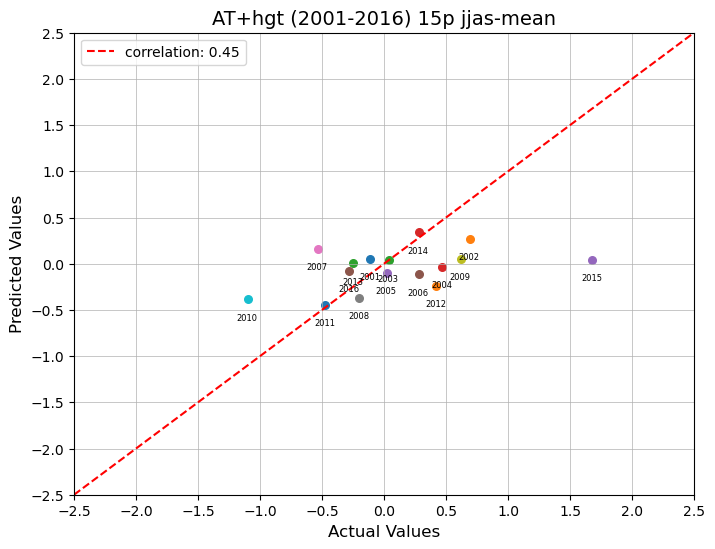

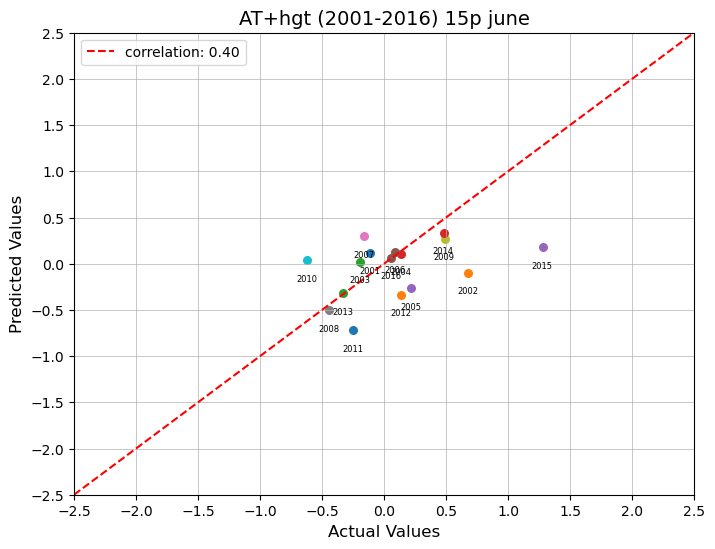

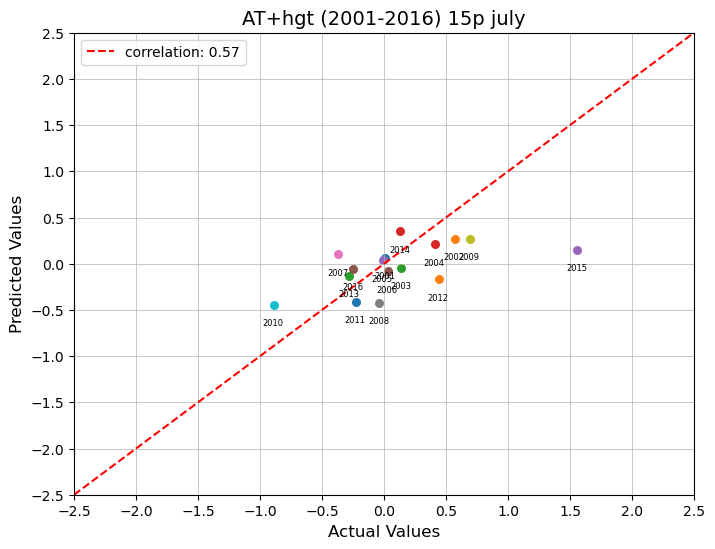

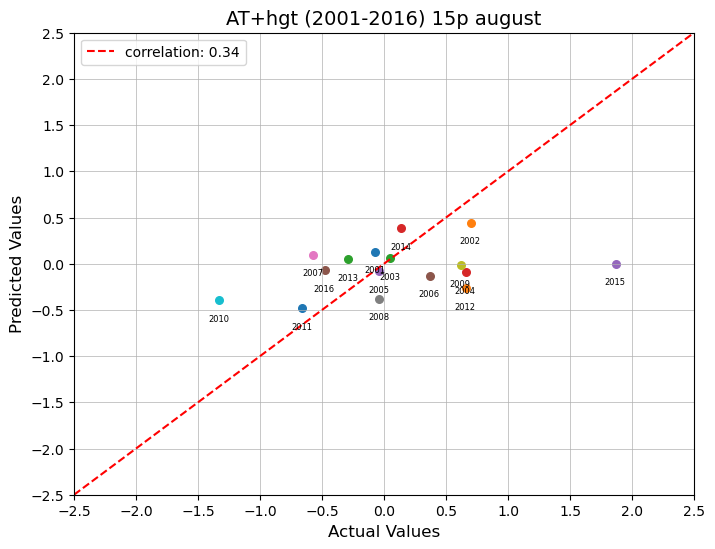

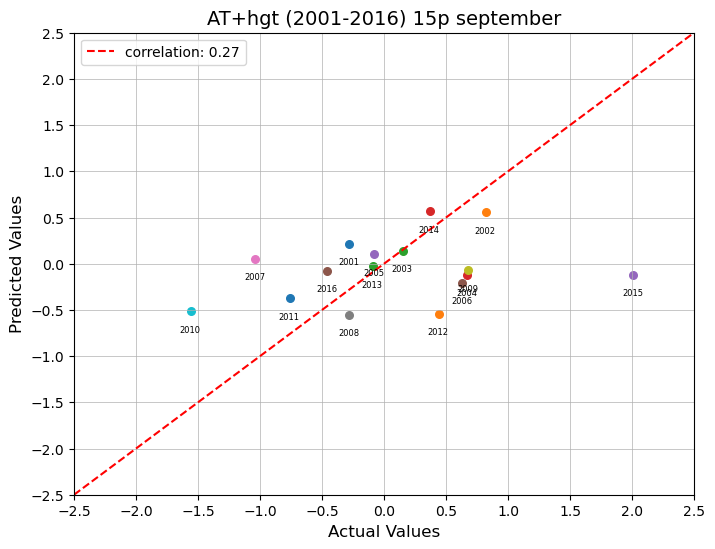

In [30]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2.5, 2.5], [-2.5, 2.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'AT+hgt (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2.5, 2.5)  # Set limits from -2 to 2
    plt.ylim(-2.5, 2.5)
    plt.xticks(np.arange(-2.5, 2.6, 0.5))  # Tick marks at every 0.5 interval
    plt.yticks(np.arange(-2.5, 2.6, 0.5))
    #plt.minorticks_on()  # Enable minor ticks between major ticks
    plt.grid(True, which='both', axis='both',  linewidth=0.5)
    plt.legend()
    plt.show